In [1]:
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
from numpy.random import default_rng
rng = default_rng()
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0

print(f"Number of original training examples: {len(x_train)}, shape: {np.shape(x_train)}")
print("Number of original test examples:", len(x_test))

Number of original training examples: 60000, shape: (60000, 28, 28, 1)
Number of original test examples: 10000


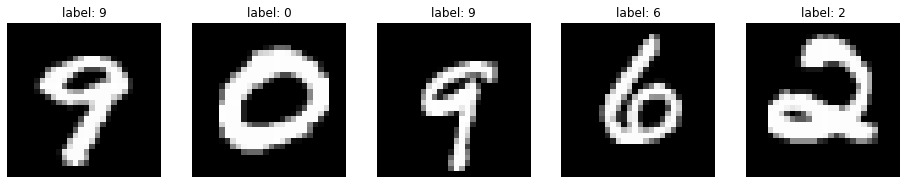

In [3]:
figure = plt.figure(figsize=(16, 10))
cols, rows = 5, 1
for i in range(1, cols * rows + 1):
    sample_idx = rng.integers(len(x_train), size=(1,)).item()
    figure.add_subplot(rows, cols, i)
    plt.title(f'label: {y_train[sample_idx]}')
    plt.axis("off")
    plt.imshow(x_train[sample_idx].squeeze(), cmap="gray")
plt.show()

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(10, (5,5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(20, (5,5), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
print(model.output_shape)
print(model.summary())

(None, 10)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 10)        260       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 20)          5020      
                                                                 
 dropout (Dropout)           (None, 8, 8, 20)          0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 20)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 320)     

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3891 - accuracy: 0.8780 - val_loss: 0.0899 - val_accuracy: 0.9755
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1657 - accuracy: 0.9516 - val_loss: 0.0777 - val_accuracy: 0.9810
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1238 - accuracy: 0.9645 - val_loss: 0.0485 - val_accuracy: 0.9861
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1047 - accuracy: 0.9688 - val_loss: 0.0370 - val_accuracy: 0.9885
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0937 - accuracy: 0.9727 - val_loss: 0.0331 - val_accuracy: 0.9901
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0881 - accuracy: 0.9739 - val_loss: 0.0363 - val_accuracy: 0.9886
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0832 - accuracy: 0.9756 - val_loss: 0.0309 -

313/313 - 2s - loss: 0.0272 - accuracy: 0.9907 - 2s/epoch - 6ms/step
Test accuracy: 0.9907000064849854


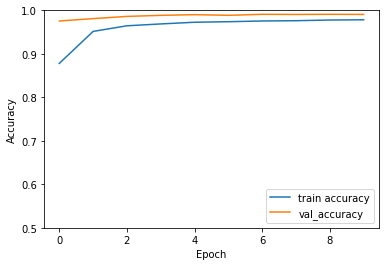

In [6]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

In [7]:
# save model for later use (e.g. unittests)
model.save(os.path.join('..', 'models', 'tf_basic_cnn_mnist'))

INFO:tensorflow:Assets written to: ..\models\tf_basic_cnn_mnist\assets


In [20]:
tf_path = os.path.join('models', 'mnist_tf_pretrained')
tf.saved_model.save(model, tf_path)

INFO:tensorflow:Assets written to: models\mnist_tf_pretrained\assets


In [26]:
!python3 -m tf2onnx.convert --saved-model ./models/mnist_tf_pretrained --output ./models/mnist_onnx_from_tf.onnx

2022-04-24 15:14:43.114655: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-24 15:14:43.114745: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-04-24 15:15:04.574630: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-24 15:15:04.574879: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2022-04-24 15:15:04.575084: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2022-04-24 15:15:04.575284: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cu

In [5]:
import torch
# use external onnx to torch conversion tool
from onnx2torch.converter import convert

onnx_path = os.path.join('models', 'mnist_onnx.onnx')
torch_model = convert(onnx_path)

print(torch_model)

GraphModule(
  (Conv_0): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (MaxPool_0): MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=[0, 0], dilation=1, ceil_mode=False)
  (Relu_0): ReLU()
  (Conv_1): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (MaxPool_1): MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=[0, 0], dilation=1, ceil_mode=False)
  (Relu_1): ReLU()
  (Constant_0): OnnxConstant()
  (Reshape_0): OnnxReshape()
  (Gemm_0): Linear(in_features=320, out_features=50, bias=True)
  (Relu_2): ReLU()
  (Gemm_1): Linear(in_features=50, out_features=10, bias=True)
  (LogSoftmax_0): OnnxSoftmaxV1V11()
)



def forward(self, input_1):
    conv_0 = self.Conv_0(input_1);  input_1 = None
    max_pool_0 = self.MaxPool_0(conv_0);  conv_0 = None
    relu_0 = self.Relu_0(max_pool_0);  max_pool_0 = None
    conv_1 = self.Conv_1(relu_0);  relu_0 = None
    max_pool_1 = self.MaxPool_1(conv_1);  conv_1 = None
    relu_1 = self.Relu_1(max_pool_1);  max_pool_1 = None
    constant_0

In [9]:
print(np.shape([x_train[0]]))

(1, 28, 28, 1)


In [6]:
for name, param in torch_model.named_parameters():
    print(name)
    print(type(param))
    print(param.data.size())
    print('------------------')

Conv_0.weight
<class 'torch.nn.parameter.Parameter'>
torch.Size([10, 1, 5, 5])
------------------
Conv_0.bias
<class 'torch.nn.parameter.Parameter'>
torch.Size([10])
------------------
Conv_1.weight
<class 'torch.nn.parameter.Parameter'>
torch.Size([20, 10, 5, 5])
------------------
Conv_1.bias
<class 'torch.nn.parameter.Parameter'>
torch.Size([20])
------------------
Gemm_0.weight
<class 'torch.nn.parameter.Parameter'>
torch.Size([50, 320])
------------------
Gemm_0.bias
<class 'torch.nn.parameter.Parameter'>
torch.Size([50])
------------------
Gemm_1.weight
<class 'torch.nn.parameter.Parameter'>
torch.Size([10, 50])
------------------
Gemm_1.bias
<class 'torch.nn.parameter.Parameter'>
torch.Size([10])
------------------


tensor([[-3.8014, -4.7755, -4.7531, -1.5174, -5.2118, -0.5540, -3.8900, -4.8292,
         -2.6876, -2.7375],
        [-0.0952, -6.2320, -3.5765, -5.2926, -6.1524, -4.6402, -4.8663, -4.4810,
         -4.2053, -4.5903],
        [-6.1454, -4.7001, -4.1767, -4.1127, -0.3050, -4.6022, -5.1774, -3.1927,
         -4.0215, -1.9292],
        [-6.1629, -0.1944, -3.3710, -4.8229, -3.4943, -5.0990, -5.2544, -3.1471,
         -3.2425, -4.7800],
        [-6.5111, -5.4855, -5.2196, -4.1087, -2.2454, -4.5443, -6.3971, -2.3494,
         -2.6726, -0.3713]], grad_fn=<ReshapeAliasBackward0>)
tensor([5, 0, 4, 1, 9])


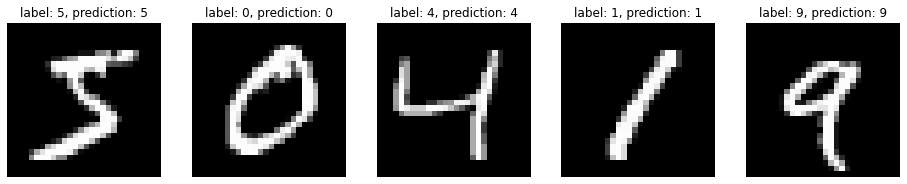

In [18]:
reshaped_input = np.reshape(x_train[:5], (5, 1, 28, 28))
torch_input = torch.from_numpy(reshaped_input).float()
torch_output = torch_model(torch_input)
print(torch_output)
torch_argmax = torch.argmax(torch_output, dim=1)
print(torch_argmax)

figure = plt.figure(figsize=(16, 10))
cols, rows = 5, 1
for i in range(1, cols * rows + 1):
    figure.add_subplot(rows, cols, i)
    plt.title(f'label: {y_train[i-1]}, prediction: {torch_argmax[i-1]}')
    plt.axis("off")
    plt.imshow(x_train[i-1].squeeze(), cmap="gray")
plt.show()